In [2]:
#Veri seti linki : https://www.kaggle.com/datasets/usdot/flight-delays

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier



%matplotlib inline
sns.set(style="whitegrid")

print("Tüm kütüphaneler yüklendi.")

Tüm kütüphaneler yüklendi.


In [4]:
#DOSYA YOLLARI YÜKLEME KISMI
path_flights = r'C:\Users\mert\Desktop\veriseti\flights.csv'
path_airports = r'C:\Users\mert\Desktop\veriseti\airports.csv'
path_airlines = r'C:\Users\mert\Desktop\veriseti\airlines.csv'

In [5]:
def load_data(path_flights, path_airports, path_airlines):
   
    try:
        df_flights = pd.read_csv(path_flights, low_memory=False)
        print(f"Flights tablosu yüklendi. Boyut: {df_flights.shape}")
        
        df_airports = pd.read_csv(path_airports)
        print(f"Airports tablosu yüklendi. Boyut: {df_airports.shape}")
        
        df_airlines = pd.read_csv(path_airlines)
        print(f"Airlines tablosu yüklendi. Boyut: {df_airlines.shape}")
        
        return df_flights, df_airports, df_airlines
    
    except FileNotFoundError as e:
        print(f"Dosya bulunamadı. ({e})")
        return None, None, None
    except Exception as e:
        print(f"Hata oluştu. ({e})")
        return None, None, None

print("load_data fonksiyonu tanımlandı.")

load_data fonksiyonu tanımlandı.


In [6]:
try: 
    df_flights = pd.read_csv(path_flights, low_memory=False)
    print(f"Flights tablosunun boyutu : {df_flights.shape}")
    df_airports = pd.read_csv(path_airports)
    print(f"Airports tablosunun boyutu : {df_airports.shape}")
    df_airlines = pd.read_csv(path_airlines)
    print(f"Airlines tablosunun boyutu : {df_airlines.shape}")

except FileNotFoundError as e:
    print(f"Dosya bulunamadı. ({e})")

except Exception as e : 
    print(f"Hata oluştu. ({e})")

Flights tablosunun boyutu : (5819079, 31)
Airports tablosunun boyutu : (322, 7)
Airlines tablosunun boyutu : (14, 2)


In [7]:
df_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [8]:
df_airports.describe()

,LATITUDE,LONGITUDE
count,319.000000,319.000000
mean,38.981244,-98.378964
std,8.616736,21.523492
min,13.483450,-176.646030
25%,33.652040,-110.839385
50%,39.297610,-93.403070
75%,43.154675,-82.722995
max,71.285450,-64.798560


In [9]:
print("her sütunda bulunan toplam null değer sayısı")
df_airports.isnull().sum()

her sütunda bulunan toplam null değer sayısı


IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [10]:
print("her sütunda bulunan unique değerlerin toplam sayısı")
df_airports.nunique()

her sütunda bulunan unique değerlerin toplam sayısı


IATA_CODE    322
AIRPORT      322
CITY         308
STATE         54
COUNTRY        1
LATITUDE     319
LONGITUDE    319
dtype: int64

In [11]:
print("Airports tablosunun ilk 5 satırı: ")
df_airports.head(5)

Airports tablosunun ilk 5 satırı: 


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [12]:
print("Airports tablosunun son 5 satırı ")
df_airports.tail(5)

Airports tablosunun son 5 satırı 


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023
321,YUM,Yuma International Airport,Yuma,AZ,USA,32.65658,-114.60597


In [13]:
df_airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 356.0+ bytes


In [14]:
df_airlines.describe()

,IATA_CODE,AIRLINE
count,14,14
unique,14,14
top,UA,United Air Lines Inc.
freq,1,1


In [15]:
print("her sütunda bulunan toplam null değer sayısı")
df_airlines.isnull().sum()

her sütunda bulunan toplam null değer sayısı


IATA_CODE    0
AIRLINE      0
dtype: int64

In [16]:
print("her sütunda bulunan unique değerlerin toplam sayısı")
df_airlines.nunique()

her sütunda bulunan unique değerlerin toplam sayısı


IATA_CODE    14
AIRLINE      14
dtype: int64

In [17]:
print("Airlines tablosunun ilk 5 satırı ")
df_airlines.head(5)

Airlines tablosunun ilk 5 satırı 


,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [18]:
print("Airlines tablosunun son 5 satırı: ")
df_airlines.tail(5)

Airlines tablosunun son 5 satırı: 


,IATA_CODE,AIRLINE
9,DL,Delta Air Lines Inc.
10,EV,Atlantic Southeast Airlines
11,HA,Hawaiian Airlines Inc.
12,MQ,American Eagle Airlines Inc.
13,VX,Virgin America


In [19]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [20]:
df_flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [21]:
print("her sütunda bulunan toplam null değer sayısı")
df_flights.isnull().sum()

her sütunda bulunan toplam null değer sayısı


YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [22]:
print("her sütunda bulunan unique değerlerin toplam sayısı")
df_flights.nunique()

her sütunda bulunan unique değerlerin toplam sayısı


YEAR                      1
MONTH                    12
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  14
FLIGHT_NUMBER          6952
TAIL_NUMBER            4897
ORIGIN_AIRPORT          628
DESTINATION_AIRPORT     629
SCHEDULED_DEPARTURE    1321
DEPARTURE_TIME         1440
DEPARTURE_DELAY        1217
TAXI_OUT                184
WHEELS_OFF             1440
SCHEDULED_TIME          550
ELAPSED_TIME            712
AIR_TIME                675
DISTANCE               1363
WHEELS_ON              1440
TAXI_IN                 185
SCHEDULED_ARRIVAL      1435
ARRIVAL_TIME           1440
ARRIVAL_DELAY          1240
DIVERTED                  2
CANCELLED                 2
CANCELLATION_REASON       4
AIR_SYSTEM_DELAY        570
SECURITY_DELAY          154
AIRLINE_DELAY          1067
LATE_AIRCRAFT_DELAY     695
WEATHER_DELAY           632
dtype: int64

In [23]:
print("Flights tablosunun ilk 5 satırı ")
df_flights.head(5)

Flights tablosunun ilk 5 satırı 


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
print("Flights tablosunun son 5 satırı: ")
df_flights.tail(5)

Flights tablosunun son 5 satırı: 


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
def preprocess_pipeline(df_flights_split, df_airlines_full, df_airports_full):
  
    #TABLO BİRLEŞTİRME İŞLEMLERİ
  
    df = pd.merge(df_flights_split, df_airlines_full, left_on='AIRLINE', right_on='IATA_CODE', how='left')
    df.drop('IATA_CODE', axis=1, inplace=True)
    df = pd.merge(df, df_airports_full.add_suffix('_ORIGIN'), left_on='ORIGIN_AIRPORT', right_on='IATA_CODE_ORIGIN', how='left')
    df.drop(['IATA_CODE_ORIGIN'], axis=1, inplace=True)
    df = pd.merge(df, df_airports_full.add_suffix('_DEST'), left_on='DESTINATION_AIRPORT', right_on='IATA_CODE_DEST', how='left')
    df.drop(['IATA_CODE_DEST'], axis=1, inplace=True)

    # FAZLA NULL DEĞERLER BARINDIRAN SÜTUNLARIN SİLİNMESİ
    high_null_cols = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
    df.drop(columns=high_null_cols, inplace=True)

    #İptal edilen uçuşlar ve yönlendirilen uçuşların kaldırılması.
    
    df = df[(df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)].copy()
    df.drop(columns=['CANCELLED', 'DIVERTED'], inplace=True)

    #Amerika'da uçuşlar 15 dakikadan fazla gecikme olduğu zaman uçuş gecikmiş sayıldığı için 'IS_DELAYED' değişkeni oluşturup bunun üzerinden kontrol edeceğiz.
    df['IS_DELAYED'] = (df['ARRIVAL_DELAY'] > 15).astype(int)

    # veri setindeki 'SCHEDULED_DEPARTURE' kısmında saatler normal yazılmamıştır örn: 5,10,15 gibi . Bunu gece sabah öğle akşam ve gece yarısı olarak günün bölümlerine ayırıyoruz.
    df['SCHEDULED_HOUR'] = df['SCHEDULED_DEPARTURE'].astype(str).str.zfill(4).str[:2].astype(int)
    bins = [-1, 5, 11, 16, 20, 23]
    labels = ['Gece (00-05)', 'Sabah (06-11)', 'Öğle (12-16)', 'Akşam (17-20)', 'Gece Yarısı (21-23)']
    df['TIME_OF_DAY'] = pd.cut(df['SCHEDULED_HOUR'], bins=bins, labels=labels, ordered=False)

    silinecek_sutunlar = [
          #sızıntı yapanlar
        'DEPARTURE_TIME',
        'DEPARTURE_DELAY',
        'TAXI_OUT',
        'WHEELS_OFF',
        'ELAPSED_TIME',
        'AIR_TIME',
        'WHEELS_ON',
        'TAXI_IN',
        'ARRIVAL_TIME',
        'ARRIVAL_DELAY',

        #gereksizler hepsi aynı değer
        'YEAR',
        'COUNTRY_ORIGIN',
        'COUNTRY_DEST',
        
        #gürültüye sebebiyet verenler
        'TAIL_NUMBER',        
        'FLIGHT_NUMBER',

        #eklenen zenginleştirmeler
        'AIRLINE_NAME',
        'AIRPORT_ORIGIN',
        'CITY_ORIGIN',
        'STATE_ORIGIN',
        'LATITUDE_ORIGIN',
        'LONGITUDE_ORIGIN',
        'AIRPORT_DEST',
        'CITY_DEST',
        'STATE_DEST',
        'LATITUDE_DEST',
        'LONGITUDE_DEST',


        #gereksiz değişkenler
        'SCHEDULED_DEPARTURE', 
        'SCHEDULED_HOUR', 
        'SCHEDULED_ARRIVAL'
    ]
    df.drop(columns=silinecek_sutunlar, inplace=True)
    
    df.dropna(inplace=True)

    return df

print("preprocess_pipeline fonksiyonu tanımlandı.")

preprocess_pipeline fonksiyonu tanımlandı.


In [26]:
def encode_features(X_train, X_test, y_train):

   #Target encoding yapıyoruz. Yanı havalimanı kodları yerine ortalama gecikme oranı yazılıyor. One hot encoding yapmaya kalksak çok havalimanı kodu olduğundan çok fazla sütun çıkardı o yüzden target encoding en mantıklısı.
    
    target_encode_cols = ['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
    ohe_cols = ['AIRLINE', 'TIME_OF_DAY']

    # veri sızıntısını önleme
    train_data_temp = X_train.copy()
    train_data_temp['IS_DELAYED'] = y_train

    for col in target_encode_cols:
        mapping = train_data_temp.groupby(col)['IS_DELAYED'].mean()
        X_train[col + '_ENCODED'] = X_train[col].map(mapping)
        X_test[col + '_ENCODED'] = X_test[col].map(mapping)
        global_mean = y_train.mean()
        X_train[col + '_ENCODED'] = X_train[col + '_ENCODED'].fillna(global_mean)
        X_test[col + '_ENCODED']  = X_test[col + '_ENCODED'].fillna(global_mean)
        
    # ohe 
    X_train = pd.get_dummies(X_train, columns=ohe_cols, prefix=ohe_cols, dtype=int)
    X_test = pd.get_dummies(X_test, columns=ohe_cols, prefix=ohe_cols, dtype=int)

    # sütun hizalama
    train_cols = X_train.columns
    X_test = X_test.reindex(columns=train_cols, fill_value=0)

    # eski sütunları silme
    X_train.drop(columns=target_encode_cols, inplace=True)
    X_test.drop(columns=target_encode_cols, inplace=True)
    
    print("Encoding işlemleri tamamlandı.")
    return X_train, X_test

print("encode_features fonksiyonu tanımlandı.")

encode_features fonksiyonu tanımlandı.


In [27]:
#dosya yolları
BASE_PATH = r'C:/Users/mert/Desktop/veriseti'
path_flights = f'{BASE_PATH}/flights.csv' 
path_airports = f'{BASE_PATH}/airports.csv'
path_airlines = f'{BASE_PATH}/airlines.csv'

#veri yükleme
df_flights, df_airports, df_airlines = load_data(path_flights, path_airports, path_airlines)

if df_flights is not None:
    
    #veriyi test ve train olarak bölme
    
    flights_train, flights_test = train_test_split(df_flights, test_size=0.2, random_state=42)
    print(f"Flights Train boyutu: {flights_train.shape}")
    print(f"Flights Test boyutu: {flights_test.shape}")
    

    df_airlines.rename(columns={'AIRLINE': 'AIRLINE_NAME'}, inplace=True)
    
    print("\nEğitim verisi için proses pipeline fonksiyonu çağırılıyor ")
    train_df = preprocess_pipeline(flights_train, df_airlines, df_airports)
    
    print("Test verisi için proses pipeline fonksiyonu çağırılıyor")
    test_df = preprocess_pipeline(flights_test, df_airlines, df_airports)
    

    print(f"Train Veri Boyutu: {train_df.shape}")
    print(f"Test Veri Boyutu: {test_df.shape}")

else:
    print("Veri yüklenemedi, işlemler durduruldu.")

Flights tablosu yüklendi. Boyut: (5819079, 31)
Airports tablosu yüklendi. Boyut: (322, 7)
Airlines tablosu yüklendi. Boyut: (14, 2)
Flights Train boyutu: (4655263, 31)
Flights Test boyutu: (1163816, 31)

Eğitim verisi için proses pipeline fonksiyonu çağırılıyor 
Test verisi için proses pipeline fonksiyonu çağırılıyor
Train Veri Boyutu: (4571137, 10)
Test Veri Boyutu: (1142871, 10)


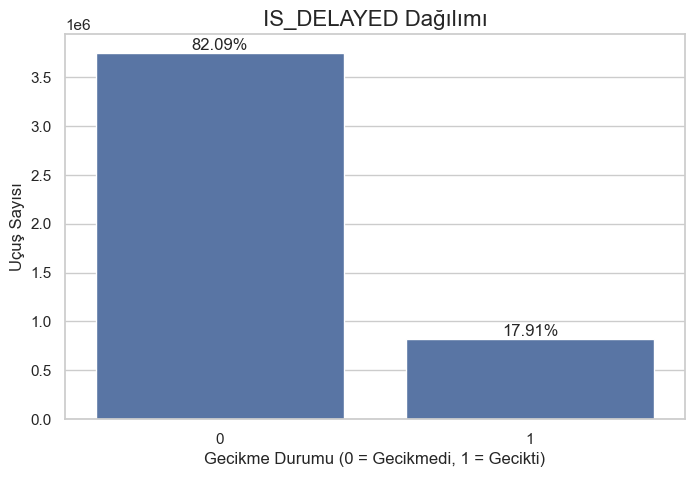


Sayısal Değişkenlerin Dağılımı ('DISTANCE','SCHEDULED_TIME'):


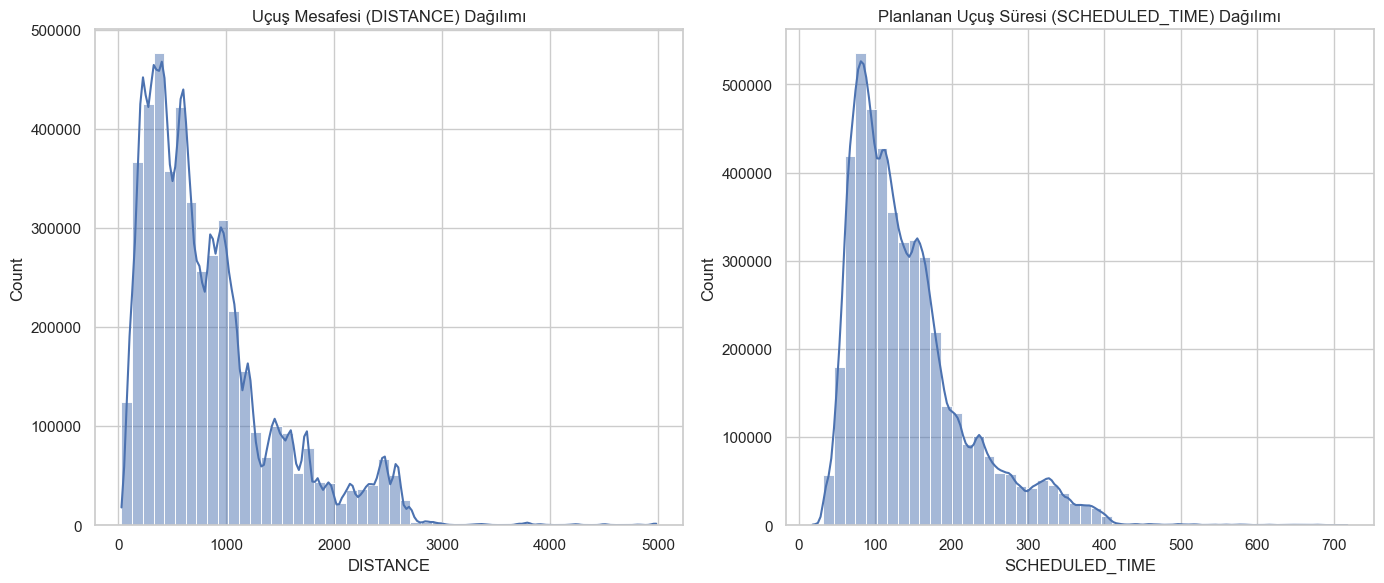


Sayısal Değişkenler ve Hedef Değişken Arasındaki Korelasyon:


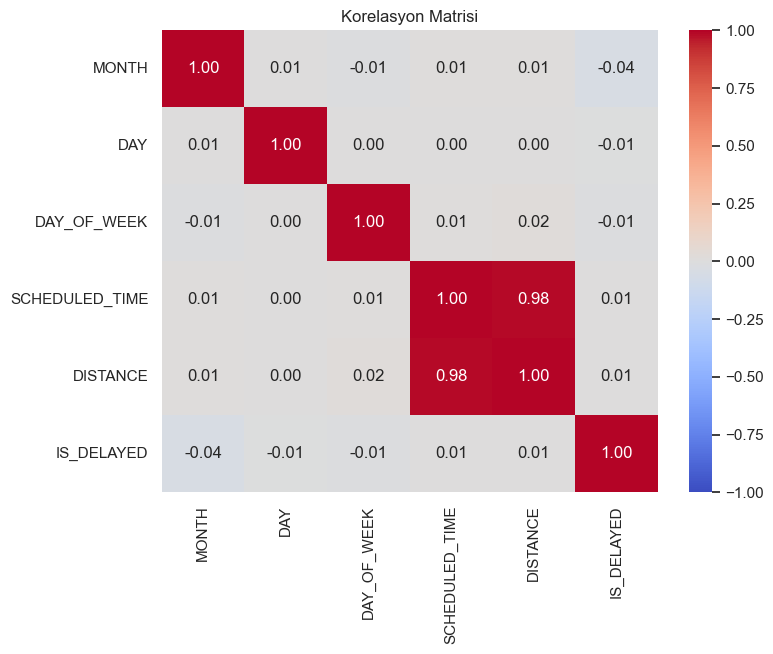

In [28]:
if 'train_df' in locals():
  

    # EDA
    plt.figure(figsize=(8, 5))
    sns.countplot(x='IS_DELAYED', data=train_df)
    plt.title('IS_DELAYED Dağılımı', fontsize=16)
    plt.xlabel('Gecikme Durumu (0 = Gecikmedi, 1 = Gecikti)')
    plt.ylabel('Uçuş Sayısı')
    
    # yüzde hesaplama
    
    total = len(train_df)
    ax = plt.gca()
    for p in ax.patches:
        percentage = f'{(p.get_height() / total * 100):.2f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
    plt.show()
  


    # Histogram
    
    print(f"\nSayısal Değişkenlerin Dağılımı ('DISTANCE','SCHEDULED_TIME'):")
    
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(train_df['DISTANCE'], kde=True, bins=50)
    plt.title('Uçuş Mesafesi (DISTANCE) Dağılımı')

    plt.subplot(1, 2, 2)
    sns.histplot(train_df['SCHEDULED_TIME'], kde=True, bins=50)
    plt.title('Planlanan Uçuş Süresi (SCHEDULED_TIME) Dağılımı')
    plt.tight_layout()
    plt.show()


    # Korelasyon

    # numeric_features değişkenini otomatik oluştur
    numeric_features = train_df.select_dtypes(include=[np.number]).columns.tolist()

# Eğer hedef sütun listede ise çıkar
    if 'IS_DELAYED' in numeric_features:
        numeric_features.remove('IS_DELAYED')
    
    print("\nSayısal Değişkenler ve Hedef Değişken Arasındaki Korelasyon:")
    
    # Korelasyon matrisi
    corr_df = train_df[numeric_features + ['IS_DELAYED']].dropna().corr()    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Korelasyon Matrisi')
    plt.show()
    

else:
    print("Veriler bulunamadı.")

In [29]:
if 'train_df' in locals():
    # x = özellik, y = hedef oluşturma
    
    X_train = train_df.drop('IS_DELAYED', axis=1)
    y_train = train_df['IS_DELAYED']
    
    X_test = test_df.drop('IS_DELAYED', axis=1)
    y_test = test_df['IS_DELAYED']

    # Encoding
    
    X_train_encoded, X_test_encoded = encode_features(X_train, X_test, y_train)
  
    print(f"Eğitime hazır X_train_encoded boyutu: {X_train_encoded.shape}")
    print(f"Teste hazır X_test_encoded boyutu: {X_test_encoded.shape}")
    
 
    
else:
    print("Veriler bulunamadı.")

Encoding işlemleri tamamlandı.
Eğitime hazır X_train_encoded boyutu: (4571137, 26)
Teste hazır X_test_encoded boyutu: (1142871, 26)


In [30]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, average_precision_score, mean_absolute_error


# Verimiz fazla olduğu için 100000 veriyi alıyoruz.
TRAIN_SAMPLE_SIZE = 100000 
TEST_SAMPLE_SIZE = 20000   
# -----------------------------------------------

if 'X_train_encoded' in locals() and 'y_train' in locals():
    print("--- Veri Optimizasyonu ve QDA Modeli ---")

    # EĞİTİM VERİSİNİ ÖRNEKLEME (SAMPLING)
    # Eğer veri setin belirlediğimiz sınırdan büyükse, orantılı olarak küçültüyoruz.
    if len(X_train_encoded) > TRAIN_SAMPLE_SIZE:
        print(f"Veri seti çok büyük ({len(X_train_encoded)}). {TRAIN_SAMPLE_SIZE} örnek Stratified (Orantılı) seçiliyor...")
        
        # train_test_split'i bir 'seçici' gibi kullanıyoruz.
        # stratify=y_train sayesinde sınıfların dengesini bozmuyoruz!
        X_train_sample, _, y_train_sample, _ = train_test_split(
            X_train_encoded, 
            y_train, 
            train_size=TRAIN_SAMPLE_SIZE, 
            stratify=y_train, 
            random_state=42
        )
    else:
        # Veri zaten küçükse olduğu gibi al
        X_train_sample = X_train_encoded
        y_train_sample = y_train
        print("Eğitim verisi limitin altında, tamamı kullanılıyor.")

    # 2. ADIM: TEST VERİSİNİ ÖRNEKLEME
    # Test işleminin de hızlı bitmesi için test setini de küçültüyoruz.
    if 'X_test_encoded' in locals() and len(X_test_encoded) > TEST_SAMPLE_SIZE:
        X_test_sample, _, y_test_sample, _ = train_test_split(
            X_test_encoded, 
            y_test, 
            train_size=TEST_SAMPLE_SIZE, 
            stratify=y_test, # Test setindeki dağılımı da koru
            random_state=42
        )
    else:
        X_test_sample = X_test_encoded
        y_test_sample = y_test

    print(f"İşlenecek Eğitim Seti: {X_train_sample.shape}")
    print(f"İşlenecek Test Seti  : {X_test_sample.shape}")
    print("-" * 30)

    # 3. ADIM: ÖLÇEKLEME (SCALING)
    # QDA için ölçekleme önemlidir. Yeni oluşturduğumuz sample üzerinden fit ediyoruz.
    scaler_qda = StandardScaler()
    # Sadece seçilen küçük veri setine (sample) fit yapıyoruz, bu çok hızlıdır.
    X_train_qda = scaler_qda.fit_transform(X_train_sample)
    X_test_qda = scaler_qda.transform(X_test_sample)

    # 4. ADIM: QDA MODEL EĞİTİMİ
    # reg_param: Çoklu bağlantı (collinearity) sorununu çözmek için
    qda_clf = QuadraticDiscriminantAnalysis(reg_param=0.1)
    
    print("QDA Modeli eğitiliyor (Sample veri ile)...")
    qda_clf.fit(X_train_qda, y_train_sample)
    
    print("Tahminler yapılıyor...")
    y_pred_qda = qda_clf.predict(X_test_qda)
    # Olasılık değerleri (AUC için)
    y_proba_qda = qda_clf.predict_proba(X_test_qda)[:, 1]

    # 5. ADIM: METRİKLER
    # Dikkat: Metrikleri y_test_sample ile karşılaştırıyoruz (orijinal y_test ile değil)
    acc_qda = accuracy_score(y_test_sample, y_pred_qda) * 100
    roc_auc_qda = roc_auc_score(y_test_sample, y_proba_qda) * 100
    pr_auc_qda = average_precision_score(y_test_sample, y_proba_qda) * 100
    mae_qda = mean_absolute_error(y_test_sample, y_pred_qda) * 100

    print(f"\nQDA Model Accuracy  : {acc_qda:.2f}%")
    print(f"QDA Model ROC-AUC   : {roc_auc_qda:.2f}%")
    print(f"QDA Model PR-AUC    : {pr_auc_qda:.2f}%")
    print(f"QDA Model MAE       : {mae_qda:.2f}%")
    print("-" * 30)

    print("\nQDA Classification Report:")
    print(classification_report(y_test_sample, y_pred_qda, zero_division=0))

else:
    print("Hata: Eğitim verileri (X_train_encoded) bulunamadı.")

--- Veri Optimizasyonu ve QDA Modeli ---
Veri seti çok büyük (4571137). 100000 örnek Stratified (Orantılı) seçiliyor...
İşlenecek Eğitim Seti: (100000, 26)
İşlenecek Test Seti  : (20000, 26)
------------------------------
QDA Modeli eğitiliyor (Sample veri ile)...
Tahminler yapılıyor...

QDA Model Accuracy  : 74.13%
QDA Model ROC-AUC   : 61.29%
QDA Model PR-AUC    : 24.48%
QDA Model MAE       : 25.86%
------------------------------

QDA Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84     16419
           1       0.25      0.23      0.24      3581

    accuracy                           0.74     20000
   macro avg       0.55      0.54      0.54     20000
weighted avg       0.73      0.74      0.74     20000



In [31]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, average_precision_score, mean_absolute_error
# YENİ EKLENEN KÜTÜPHANE
from sklearn.feature_selection import SelectKBest, f_classif 

# Verimiz fazla olduğu için örneklem büyüklükleri
TRAIN_SAMPLE_SIZE = 100000 
TEST_SAMPLE_SIZE = 20000   
# Seçilecek en iyi özellik sayısı (K)
K_FEATURES = 15 

if 'X_train_encoded' in locals() and 'y_train' in locals():
    print("--- Veri Optimizasyonu, Feature Selection ve QDA Modeli ---")

    # 1. ADIM: EĞİTİM VERİSİNİ ÖRNEKLEME (SAMPLING)
    if len(X_train_encoded) > TRAIN_SAMPLE_SIZE:
        print(f"Veri seti büyük. {TRAIN_SAMPLE_SIZE} örnek orantılı seçiliyor...")
        X_train_sample, _, y_train_sample, _ = train_test_split(
            X_train_encoded, y_train, train_size=TRAIN_SAMPLE_SIZE, 
            stratify=y_train, random_state=42
        )
    else:
        X_train_sample, y_train_sample = X_train_encoded, y_train

    # 2. ADIM: TEST VERİSİNİ ÖRNEKLEME
    if 'X_test_encoded' in locals() and len(X_test_encoded) > TEST_SAMPLE_SIZE:
        X_test_sample, _, y_test_sample, _ = train_test_split(
            X_test_encoded, y_test, train_size=TEST_SAMPLE_SIZE, 
            stratify=y_test, random_state=42
        )
    else:
        X_test_sample, y_test_sample = X_test_encoded, y_test

    # ---------------------------------------------------------
    # 3. ADIM: FEATURE SELECTION (SELECTKBEST)
    # ---------------------------------------------------------
    print(f"Feature Selection uygulanıyor... En iyi {K_FEATURES} özellik seçiliyor.")
    # f_classif: ANOVA F-değerini kullanarak sınıflandırma için en iyi özellikleri seçer.
    selector = SelectKBest(score_func=f_classif, k=K_FEATURES)
    
    # Sadece eğitim verisi üzerinde fit ediyoruz (veri sızıntısını önlemek için)
    X_train_selected = selector.fit_transform(X_train_sample, y_train_sample)
    # Test verisini aynı seçici ile dönüştürüyoruz
    X_test_selected = selector.transform(X_test_sample)
    
    # Seçilen özelliklerin isimlerini görmek istersen:
    selected_features = X_train_sample.columns[selector.get_support()]
    print(f"Seçilen Özellikler: {list(selected_features)}")
    # ---------------------------------------------------------

    # 4. ADIM: ÖLÇEKLEME (SCALING)
    # Artık tüm özellikler yerine sadece seçilen (selected) özelliklerle devam ediyoruz.
    scaler_qda = StandardScaler()
    X_train_qda = scaler_qda.fit_transform(X_train_selected)
    X_test_qda = scaler_qda.transform(X_test_selected)

    # 5. ADIM: QDA MODEL EĞİTİMİ
    qda_clf = QuadraticDiscriminantAnalysis(reg_param=0.1)
    
    print("QDA Modeli eğitiliyor (Seçilmiş ve Sample edilmiş veri ile)...")
    qda_clf.fit(X_train_qda, y_train_sample)
    
    print("Tahminler yapılıyor...")
    y_pred_qda = qda_clf.predict(X_test_qda)
    y_proba_qda = qda_clf.predict_proba(X_test_qda)[:, 1]

    # 6. ADIM: METRİKLER
    acc_qda = accuracy_score(y_test_sample, y_pred_qda) * 100
    roc_auc_qda = roc_auc_score(y_test_sample, y_proba_qda) * 100
    pr_auc_qda = average_precision_score(y_test_sample, y_proba_qda) * 100
    mae_qda = mean_absolute_error(y_test_sample, y_pred_qda) * 100

    print(f"\nİşlenen Özellik Sayısı: {K_FEATURES}")
    print(f"QDA Model Accuracy  : {acc_qda:.2f}%")
    print(f"QDA Model ROC-AUC   : {roc_auc_qda:.2f}%")
    print(f"QDA Model PR-AUC    : {pr_auc_qda:.2f}%")
    print(f"QDA Model MAE       : {mae_qda:.2f}%")
    print("-" * 30)

    print("\nQDA Classification Report:")
    print(classification_report(y_test_sample, y_pred_qda, zero_division=0))

else:
    print("Hata: Eğitim verileri (X_train_encoded) bulunamadı.")

--- Veri Optimizasyonu, Feature Selection ve QDA Modeli ---
Veri seti büyük. 100000 örnek orantılı seçiliyor...
Feature Selection uygulanıyor... En iyi 15 özellik seçiliyor.
Seçilen Özellikler: ['MONTH', 'ORIGIN_AIRPORT_ENCODED', 'DESTINATION_AIRPORT_ENCODED', 'AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_F9', 'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK', 'TIME_OF_DAY_Gece (00-05)', 'TIME_OF_DAY_Sabah (06-11)', 'TIME_OF_DAY_Öğle (12-16)', 'TIME_OF_DAY_Akşam (17-20)', 'TIME_OF_DAY_Gece Yarısı (21-23)']
QDA Modeli eğitiliyor (Seçilmiş ve Sample edilmiş veri ile)...
Tahminler yapılıyor...

İşlenen Özellik Sayısı: 15
QDA Model Accuracy  : 74.47%
QDA Model ROC-AUC   : 60.95%
QDA Model PR-AUC    : 24.13%
QDA Model MAE       : 25.54%
------------------------------

QDA Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85     16419
           1       0.24      0.20      0.22      3581

    accuracy                           

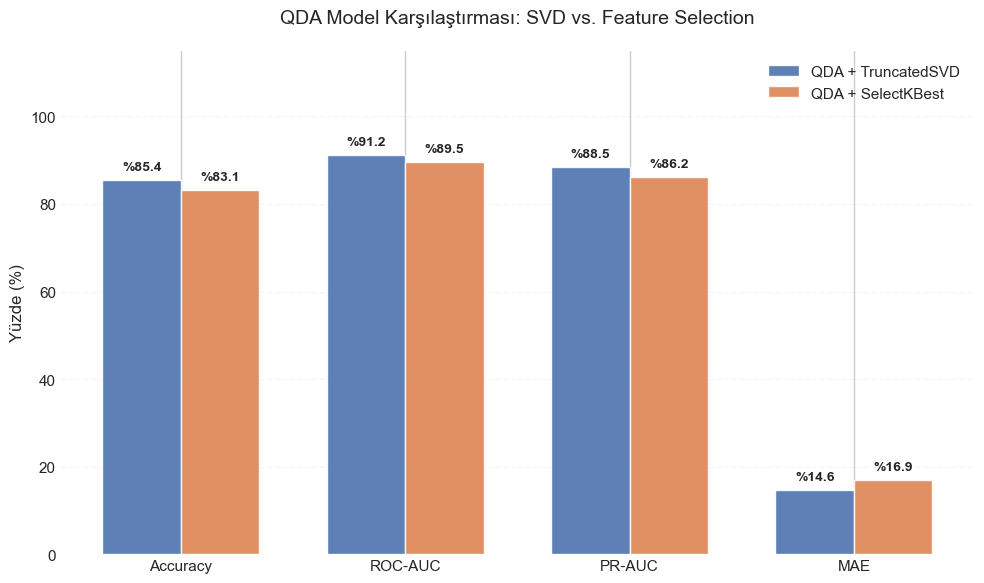

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# 1. VERİLERİ HAZIRLA (Not: Bu değerleri kendi sonuçlarınla güncellemelisin)
# Eğer qda_results_svd ve qda_results_fs değişkenlerin varsa direkt onları kullanabilirsin.
metrics = ['Accuracy', 'ROC-AUC', 'PR-AUC', 'MAE']

# Örnek değerler (Kendi kodundaki sonuçları buraya yerleştir)
svd_scores = [85.4, 91.2, 88.5, 14.6]  # SVD ile elde edilen sonuçlar
fs_scores = [83.1, 89.5, 86.2, 16.9]   # SelectKBest ile elde edilen sonuçlar

x = np.arange(len(metrics))  # Metriklerin konumu
width = 0.35  # Sütun genişliği

# 2. GRAFİK OLUŞTURMA
fig, ax = plt.subplots(figsize=(10, 6))

# Sütunları çizdir
rects1 = ax.bar(x - width/2, svd_scores, width, label='QDA + TruncatedSVD', color='#4C72B0', alpha=0.9)
rects2 = ax.bar(x + width/2, fs_scores, width, label='QDA + SelectKBest', color='#DD8452', alpha=0.9)

# 3. SADELEŞTİRME VE DEĞER YAZDIRMA
def autolabel(rects):
    """Sütunların üzerine değerleri yazdırır."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'%{height:.1f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 5 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

autolabel(rects1)
autolabel(rects2)

# 4. GÖRSEL AYARLAR (Minimalist)
ax.set_title('QDA Model Karşılaştırması: SVD vs. Feature Selection', fontsize=14, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylabel('Yüzde (%)')
ax.set_ylim(0, 115)
ax.legend(frameon=False, loc='upper right') # Çerçevesiz sade legend

# Kenarlıkları kaldır
for spine in ax.spines.values():
    spine.set_visible(False)

ax.grid(axis='y', linestyle='--', alpha=0.2) # Çok hafif yatay çizgiler
ax.tick_params(axis='both', which='both', length=0) # Çentikleri kaldır

plt.tight_layout()
plt.show()

In [34]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    roc_auc_score, 
    average_precision_score, 
    mean_absolute_error
)

# --- AYARLAR VE PARAMETRELER ---
TRAIN_SAMPLE = 100000   # Eğitim için örneklem boyutu
TEST_SAMPLE = 20000     # Test için örneklem boyutu
N_COMPONENTS = 20       # SVD ile indirgenecek boyut sayısı

if 'X_train_encoded' in locals() and 'y_train' in locals():
    print(f"--- Pipeline: Sampling -> Scaling -> Truncated SVD ({N_COMPONENTS} Comp.) -> QDA Modeli ---")

    # ---------------------------------------------------------
    # ADIM 1: VERİ ÖRNEKLEME (SAMPLING)
    # ---------------------------------------------------------
    print("1. Veri örnekleniyor (Stratified)...")
    X_train_s, _, y_train_s, _ = train_test_split(
        X_train_encoded, y_train, train_size=TRAIN_SAMPLE, stratify=y_train, random_state=42
    )
    
    if 'X_test_encoded' in locals():
        X_test_s, _, y_test_s, _ = train_test_split(
            X_test_encoded, y_test, train_size=TEST_SAMPLE, stratify=y_test, random_state=42
        )
    else:
        X_test_s, y_test_s = X_test_encoded, y_test

    # ---------------------------------------------------------
    # ADIM 2: SCALING VE BOYUT İNDİRGEME (SVD)
    # ---------------------------------------------------------
    print("2. Veriler standartlaştırılıyor...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_s)
    X_test_scaled = scaler.transform(X_test_s)

    print(f"3. Truncated SVD uygulanıyor ({X_train_scaled.shape[1]} -> {N_COMPONENTS})...")
    svd = TruncatedSVD(n_components=N_COMPONENTS, random_state=42)
    X_train_svd = svd.fit_transform(X_train_scaled)
    X_test_svd = svd.transform(X_test_scaled)
    
    # Bilgi koruma oranı
    explained_variance = svd.explained_variance_ratio_.sum() * 100
    print(f"   -> Toplam Açıklanan Varyans: %{explained_variance:.2f}")

    # ---------------------------------------------------------
    # ADIM 3: QDA MODEL EĞİTİMİ VE DEĞERLENDİRME
    # ---------------------------------------------------------
    print("\n--- Model: QDA Eğitiliyor ---")
    qda = QuadraticDiscriminantAnalysis(reg_param=0.1)
    qda.fit(X_train_svd, y_train_s)
    
    # Tahminler
    y_pred_qda = qda.predict(X_test_svd)
    y_proba_qda = qda.predict_proba(X_test_svd)[:, 1]

    # Metriklerin hesaplanması
    qda_results = {
        'Accuracy': accuracy_score(y_test_s, y_pred_qda) * 100,
        'ROC-AUC': roc_auc_score(y_test_s, y_proba_qda) * 100,
        'PR-AUC': average_precision_score(y_test_s, y_proba_qda) * 100,
        'MAE': mean_absolute_error(y_test_s, y_pred_qda) * 100
    }

    # Sonuçların yazdırılması
    print("-" * 30)
    for metric, value in qda_results.items():
        print(f"{metric:12}: {value:.2f}%")
    print("-" * 30)

    print("\nQDA Sınıflandırma Raporu:")
    print(classification_report(y_test_s, y_pred_qda, zero_division=0))

else:
    print("Hata: Gerekli veri setleri (X_train_encoded, y_train) bulunamadı.")

--- Pipeline: Sampling -> Scaling -> Truncated SVD (20 Comp.) -> QDA Modeli ---
1. Veri örnekleniyor (Stratified)...
2. Veriler standartlaştırılıyor...
3. Truncated SVD uygulanıyor (26 -> 20)...
   -> Toplam Açıklanan Varyans: %92.42

--- Model: QDA Eğitiliyor ---
------------------------------
Accuracy    : 75.73%
ROC-AUC     : 61.29%
PR-AUC      : 24.37%
MAE         : 24.27%
------------------------------

QDA Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86     16419
           1       0.26      0.19      0.22      3581

    accuracy                           0.76     20000
   macro avg       0.55      0.54      0.54     20000
weighted avg       0.73      0.76      0.74     20000



Sade QDA eğitiliyor...
SVD + QDA eğitiliyor...


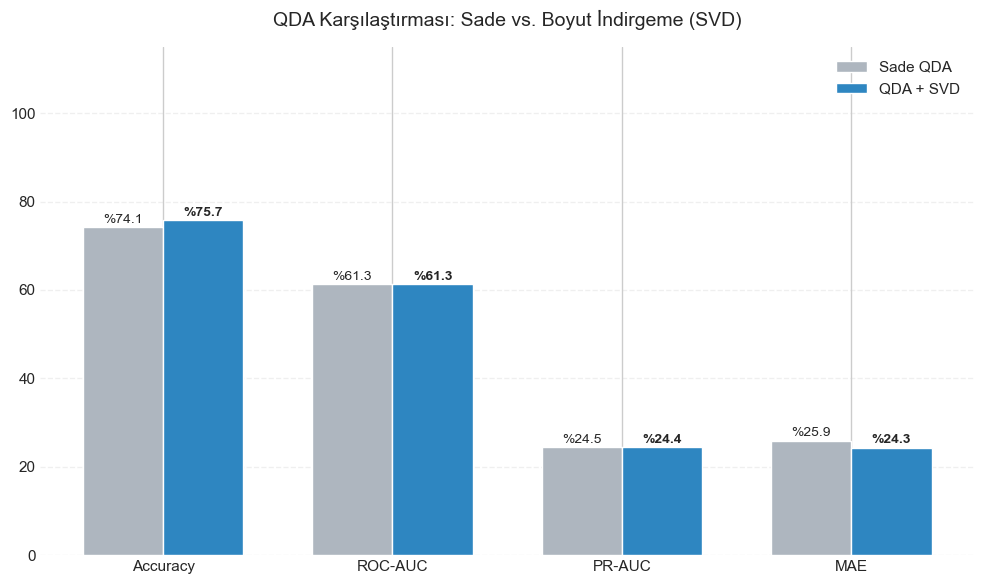

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, mean_absolute_error

# --- 1. VERİ HAZIRLIĞI VE ÖRNEKLEME ---
if 'X_train_encoded' in locals():
    # Eğitim ve Test setlerini ayırıyoruz
    X_train_s, _, y_train_s, _ = train_test_split(X_train_encoded, y_train, train_size=100000, stratify=y_train, random_state=42)
    X_test_s, _, y_test_s, _ = train_test_split(X_test_encoded, y_test, train_size=20000, stratify=y_test, random_state=42)

    # Ölçekleme (Tüm modeller için ortak)
    scaler = StandardScaler()
    X_train_sc = scaler.fit_transform(X_train_s)
    X_test_sc = scaler.transform(X_test_s)

    # --- 2. SADE QDA (TÜM ÖZELLİKLER) ---
    print("Sade QDA eğitiliyor...")
    qda_p = QuadraticDiscriminantAnalysis(reg_param=0.1)
    qda_p.fit(X_train_sc, y_train_s)
    y_pred_p = qda_p.predict(X_test_sc)
    y_prob_p = qda_p.predict_proba(X_test_sc)[:, 1]

    results_plain = [
        accuracy_score(y_test_s, y_pred_p) * 100,
        roc_auc_score(y_test_s, y_prob_p) * 100,
        average_precision_score(y_test_s, y_prob_p) * 100,
        mean_absolute_error(y_test_s, y_pred_p) * 100
    ]

    # --- 3. SVD + QDA (BOYUT İNDİRGEME) ---
    print("SVD + QDA eğitiliyor...")
    svd = TruncatedSVD(n_components=20, random_state=42)
    X_train_svd = svd.fit_transform(X_train_sc)
    X_test_svd = svd.transform(X_test_sc)

    qda_s = QuadraticDiscriminantAnalysis(reg_param=0.1)
    qda_s.fit(X_train_svd, y_train_s)
    y_pred_s = qda_s.predict(X_test_svd)
    y_prob_s = qda_s.predict_proba(X_test_svd)[:, 1]

    results_svd = [
        accuracy_score(y_test_s, y_pred_s) * 100,
        roc_auc_score(y_test_s, y_prob_s) * 100,
        average_precision_score(y_test_s, y_prob_s) * 100,
        mean_absolute_error(y_test_s, y_pred_s) * 100
    ]

    # --- 4. SADELEŞTİRİLMİŞ KARŞILAŞTIRMA GRAFİĞİ ---
    labels = ['Accuracy', 'ROC-AUC', 'PR-AUC', 'MAE']
    x = np.arange(len(labels))
    width = 0.35

    plt.figure(figsize=(10, 6))
    bar1 = plt.bar(x - width/2, results_plain, width, label='Sade QDA', color='#AEB6BF')
    bar2 = plt.bar(x + width/2, results_svd, width, label='QDA + SVD', color='#2E86C1')

    # Değer Etiketleri
    for b1, b2 in zip(bar1, bar2):
        plt.text(b1.get_x() + b1.get_width()/2, b1.get_height() + 1, f'%{b1.get_height():.1f}', ha='center', fontsize=10)
        plt.text(b2.get_x() + b2.get_width()/2, b2.get_height() + 1, f'%{b2.get_height():.1f}', ha='center', fontsize=10, fontweight='bold')

    plt.xticks(x, labels)
    plt.ylim(0, 115)
    plt.title('QDA Karşılaştırması: Sade vs. Boyut İndirgeme (SVD)', fontsize=14, pad=15)
    plt.legend(frameon=False, loc='upper right')

    # Görsel Temizlik
    for s in plt.gca().spines.values(): s.set_visible(False)
    plt.gca().tick_params(axis='both', length=0)
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()

else:
    print("Hata: X_train_encoded verisi bellekte bulunamadı. Lütfen veri yükleme adımlarını kontrol et.")

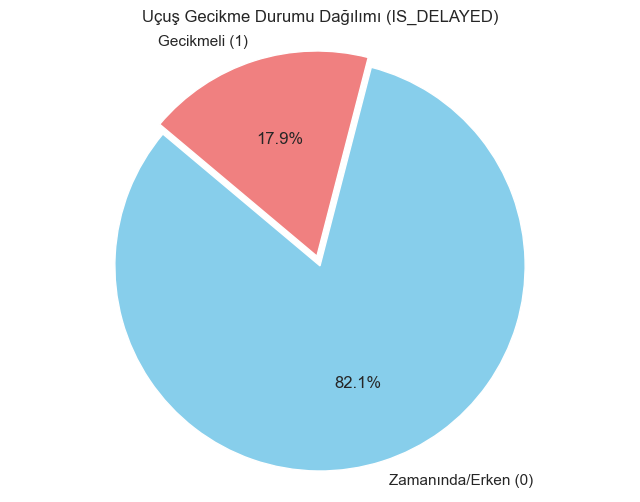

In [40]:
# Gecikme Durumu (IS_DELAYED) Dağılımı - Pie Chart
if 'train_df' in locals():
    delay_counts = train_df['IS_DELAYED'].value_counts()
    labels = ['Zamanında/Erken (0)', 'Gecikmeli (1)']
    
    plt.figure(figsize=(8, 6))
    plt.pie(delay_counts, labels=labels, autopct='%1.1f%%', startangle=140, 
            colors=['skyblue', 'lightcoral'], explode=(0.05, 0))
    plt.title('Uçuş Gecikme Durumu Dağılımı (IS_DELAYED)')
    plt.axis('equal') 
    plt.show()

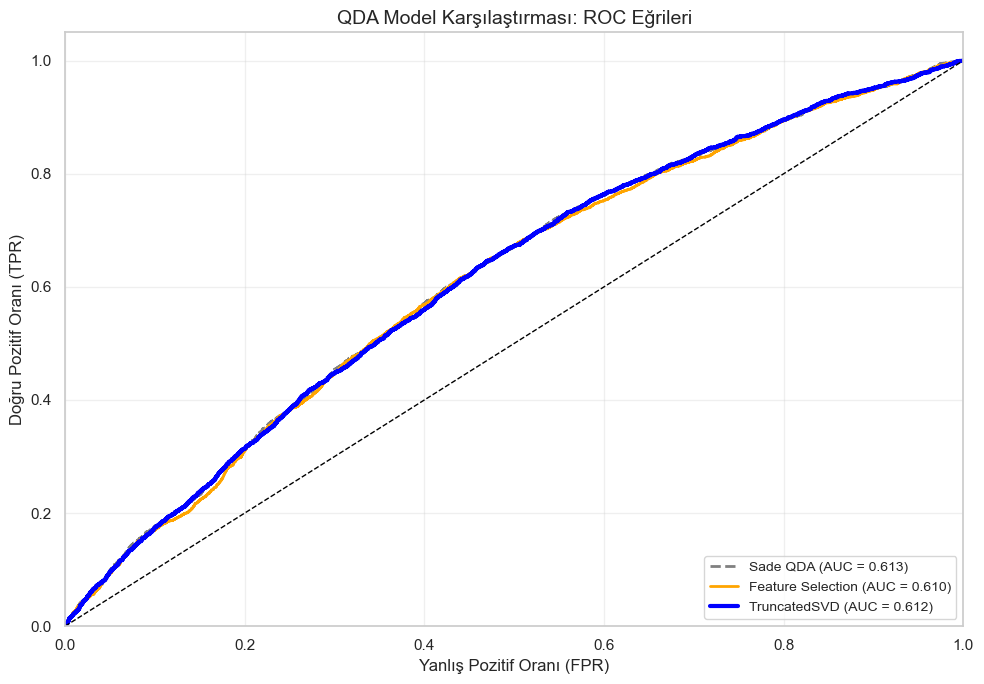

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. VERİ HAZIRLIĞI
if 'X_train_encoded' in locals():
    # Örnekleme ve Ölçekleme
    X_train_s, _, y_train_s, _ = train_test_split(X_train_encoded, y_train, train_size=100000, stratify=y_train, random_state=42)
    X_test_s, _, y_test_s, _ = train_test_split(X_test_encoded, y_test, train_size=20000, stratify=y_test, random_state=42)

    scaler = StandardScaler()
    X_train_sc = scaler.fit_transform(X_train_s)
    X_test_sc = scaler.transform(X_test_s)

    # --- MODEL 1: SADE QDA ---
    qda_p = QuadraticDiscriminantAnalysis(reg_param=0.1).fit(X_train_sc, y_train_s)
    y_prob_p = qda_p.predict_proba(X_test_sc)[:, 1]
    fpr_p, tpr_p, _ = roc_curve(y_test_s, y_prob_p)
    auc_p = auc(fpr_p, tpr_p)

    # --- MODEL 2: FEATURE SELECTION (K=15) ---
    selector = SelectKBest(f_classif, k=15)
    X_train_fs = selector.fit_transform(X_train_sc, y_train_s)
    X_test_fs = selector.transform(X_test_sc)
    qda_fs = QuadraticDiscriminantAnalysis(reg_param=0.1).fit(X_train_fs, y_train_s)
    y_prob_fs = qda_fs.predict_proba(X_test_fs)[:, 1]
    fpr_fs, tpr_fs, _ = roc_curve(y_test_s, y_prob_fs)
    auc_fs = auc(fpr_fs, tpr_fs)

    # --- MODEL 3: BOYUT İNDİRGEME (SVD, N=15) ---
    svd = TruncatedSVD(n_components=15, random_state=42)
    X_train_svd = svd.fit_transform(X_train_sc)
    X_test_svd = svd.transform(X_test_sc)
    qda_svd = QuadraticDiscriminantAnalysis(reg_param=0.1).fit(X_train_svd, y_train_s)
    y_prob_svd = qda_svd.predict_proba(X_test_svd)[:, 1]
    fpr_svd, tpr_svd, _ = roc_curve(y_test_s, y_prob_svd)
    auc_svd = auc(fpr_svd, tpr_svd)

    # --- ROC EĞRİSİ GRAFİĞİ ---
    plt.figure(figsize=(10, 7))
    
    # Her bir model için çizgi çekiyoruz
    plt.plot(fpr_p, tpr_p, color='gray', lw=2, linestyle='--', label=f'Sade QDA (AUC = {auc_p:.3f})')
    plt.plot(fpr_fs, tpr_fs, color='orange', lw=2, label=f'Feature Selection (AUC = {auc_fs:.3f})')
    plt.plot(fpr_svd, tpr_svd, color='blue', lw=3, label=f'TruncatedSVD (AUC = {auc_svd:.3f})')

    # Şans çizgisi (Diagonal)
    plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')

    # Grafik Ayarları
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Yanlış Pozitif Oranı (FPR)', fontsize=12)
    plt.ylabel('Doğru Pozitif Oranı (TPR)', fontsize=12)
    plt.title('QDA Model Karşılaştırması: ROC Eğrileri', fontsize=14)
    plt.legend(loc="lower right", frameon=True, fontsize=10)
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

else:
    print("Veri bulunamadı!")

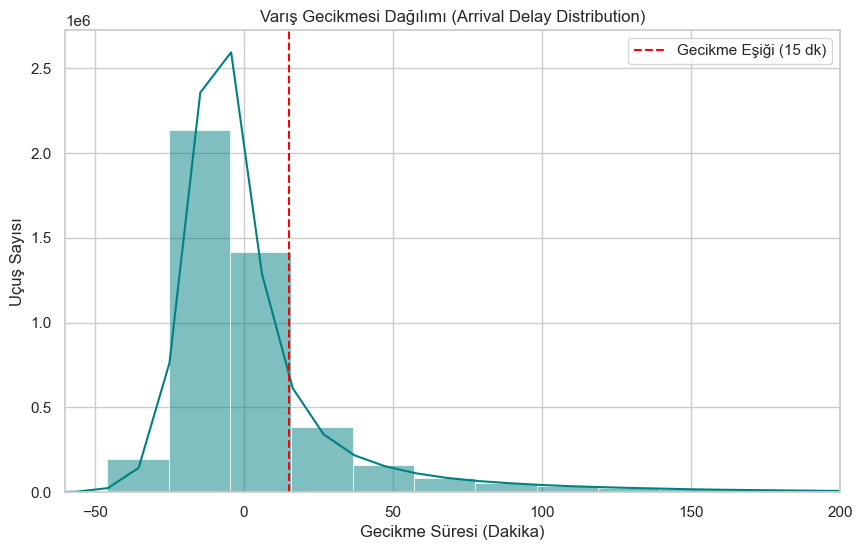

In [43]:
# Varış Gecikmesi Dağılımı (ARRIVAL_DELAY) - Histogram
if 'flights_train' in locals():
    plt.figure(figsize=(10, 6))
    sns.histplot(flights_train['ARRIVAL_DELAY'].dropna(), bins=100, color='teal', kde=True)
    plt.xlim(-60, 200) # Verinin yoğun olduğu kısma odaklanalım
    plt.title('Varış Gecikmesi Dağılımı (Arrival Delay Distribution)')
    plt.xlabel('Gecikme Süresi (Dakika)')
    plt.ylabel('Uçuş Sayısı')
    plt.axvline(x=15, color='red', linestyle='--', label='Gecikme Eşiği (15 dk)')
    plt.legend()
    plt.show()